In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
import matplotlib.patches as patches
import matplotlib.lines as lines

In [2]:
# Plot the results
def my_plot(X_t,Y_t,M_t,V_t,ylim):
    # (X_t,Y_t): test data
    # M_t: mean estimator m(X_t)
    # V_t: variance estimator f(X_t)
    # The prediction interval is [M_t-sqrt{V_t},M+sqrt{V_t}]
    
    X_sort = np.sort(X_t, axis=0)
    X_sort_indices = np.argsort(X_t, axis=0)
    Y_sort = Y_t[X_sort_indices[:, 0]]
    lower_CI = M_t-np.sqrt(V_t)
    lower_CI_sort = lower_CI[X_sort_indices[:, 0]]
    upper_CI = M_t+np.sqrt(V_t)
    upper_CI_sort = upper_CI[X_sort_indices[:, 0]]
    mean = M_t[X_sort_indices[:, 0]]
    
    sns.set()
    sns.set_style("darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    palette = sns.color_palette("Blues_r", 4)
    sns.scatterplot(x=X_sort[:,0], y=Y_sort[:,0], color=palette[0], edgecolor='w', linewidth=0.5)
    plt.fill_between(X_sort[:,0], lower_CI_sort[:,0], upper_CI_sort[:,0], color=palette[1], alpha=0.4)
    plt.plot(X_sort, lower_CI_sort, color=palette[2], lw=2,alpha=0.6)
    plt.plot(X_sort, upper_CI_sort, color=palette[2], lw=2,alpha=0.6)
    plt.plot(X_sort, mean, '-', color='orange', linewidth=2,label="Mean")
#    plt.plot(X_sort, mean, color=palette[3], linewidth=2, label="Mean")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.ylim(ylim)
    legend_elements = [
    patches.Rectangle((0, 0), 1, 1, lw=0, color=palette[1], alpha=0.4, label="PI"),
    lines.Line2D([0], [0], color='orange', lw=2, label="Mean")]
    plt.legend(handles=legend_elements, loc='upper right')
#     plt.legend(loc='upper right')
    plt.show()
    # plt.savefig("plot.png", dpi=300)
    coverage = (np.power(Y_t[:,0]-M_t[:,0], 2) <= V_t[:,0]).mean()
    bandwidth = np.mean(V_t[:,0])
    print("The overall coverage is", coverage)
    print("The mean bandwidth for testing data is", bandwidth)

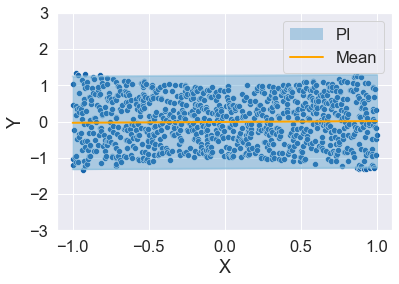

The overall coverage is 0.988
The mean bandwidth for testing data is 1.6367894609990998


In [3]:
# Test 1

# Generate i.i.d data
np.random.seed(5)
n_pre = 1000
n_opt = 100
n_adj = 100
n_t = 1000
n = n_pre+n_opt+n_adj+n_t

X = np.random.uniform(-1, 1, n).reshape(-1, 1)
Y = np.sqrt(1+np.power(X, 2))  * np.random.uniform(-1, 1, n).reshape(-1, 1)

X_train = X[0:n_pre+n_opt+n_adj,:]
Y_train = Y[0:n_pre+n_opt+n_adj,:]
x_train = X_train[:,0]
y_train = Y_train[:,0]

X_test = X[n_pre+n_opt+n_adj:,:]
Y_test = Y[n_pre+n_opt+n_adj:,:]
x_test = X_test[:,0]
y_test = Y_test[:,0]

# Fit a simple linear regression model on the training data
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)

# Calculate the predicted values for both training and testing data
y_train_pred = intercept + slope * x_train
y_test_pred = intercept + slope * x_test

# Calculate the residuals for the training data
residuals = y_train - y_train_pred

# Estimate the variance of the error term
sigma2 = np.var(residuals, ddof=2)

# Calculate the standard error of the predicted values
n = len(x_train)
x_mean = np.mean(x_train)
x_dev = x_train - x_mean
x_dev_sq = x_dev**2


# Calculate the standard error of prediction for each x value in the range
se_pred = np.sqrt(sigma2 * (1 + 1/n + (x_test - x_mean)**2 / np.sum(x_dev_sq)))

# Compute the critical t-value
alpha = 0.05  # 95% confidence level
df = n - 2
t_crit = stats.t.ppf(1 - alpha/2, df)

# Calculate the prediction interval
m_test = y_test_pred
M_test = m_test.reshape(-1,1)
v_test = ((t_crit * se_pred)**2)*np.ones(len(m_test))
V_test = v_test.reshape(-1,1)


#plot 
my_plot(X_test,Y_test,M_test,V_test,ylim=[-3,3])

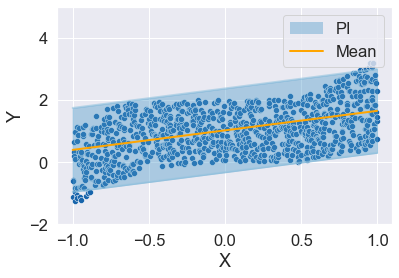

The overall coverage is 0.982
The mean bandwidth for testing data is 1.8193156641114787


In [4]:
# Test 2

# Generate i.i.d data
np.random.seed(0)
n_pre = 1000
n_opt = 100
n_adj = 100
n_t = 1000
n = n_pre+n_opt+n_adj+n_t

X = np.random.uniform(-1, 1, n).reshape(-1, 1)
Y = 1+np.power(X, 3)+np.sqrt(1+np.power(X, 2))  * np.random.uniform(-1, 1, n).reshape(-1, 1)

X_train = X[0:n_pre+n_opt+n_adj,:]
Y_train = Y[0:n_pre+n_opt+n_adj,:]
x_train = X_train[:,0]
y_train = Y_train[:,0]

X_test = X[n_pre+n_opt+n_adj:,:]
Y_test = Y[n_pre+n_opt+n_adj:,:]
x_test = X_test[:,0]
y_test = Y_test[:,0]

# Fit a simple linear regression model on the training data
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)

# Calculate the predicted values for both training and testing data
y_train_pred = intercept + slope * x_train
y_test_pred = intercept + slope * x_test

# Calculate the residuals for the training data
residuals = y_train - y_train_pred

# Estimate the variance of the error term
sigma2 = np.var(residuals, ddof=2)

# Calculate the standard error of the predicted values
n = len(x_train)
x_mean = np.mean(x_train)
x_dev = x_train - x_mean
x_dev_sq = x_dev**2


# Calculate the standard error of prediction for each x value in the range
se_pred = np.sqrt(sigma2 * (1 + 1/n + (x_test - x_mean)**2 / np.sum(x_dev_sq)))

# Compute the critical t-value
alpha = 0.05  # 95% confidence level
df = n - 2
t_crit = stats.t.ppf(1 - alpha/2, df)

# Calculate the prediction interval
m_test = y_test_pred
M_test = m_test.reshape(-1,1)
v_test = ((t_crit * se_pred)**2)*np.ones(len(m_test))
V_test = v_test.reshape(-1,1)


#plot 
my_plot(X_test,Y_test,M_test,V_test,ylim=[-2,5])

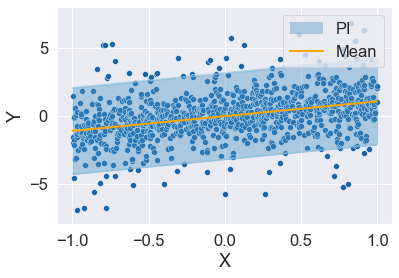

The overall coverage is 0.934
The mean bandwidth for testing data is 10.030278777881463


In [5]:
# Test 3

# Generate i.i.d data
np.random.seed(1)
n_pre = 1000
n_opt = 100
n_adj = 100
n_t = 1000
n = n_pre+n_opt+n_adj+n_t

X = np.random.uniform(-1, 1, n).reshape(-1, 1)
Y = np.random.laplace(X,np.sqrt(1+np.power(X, 2)))
Y = np.median(np.hstack([X+6,X-6,Y]),axis=1).reshape(-1, 1)

X_train = X[0:n_pre+n_opt+n_adj,:]
Y_train = Y[0:n_pre+n_opt+n_adj,:]
x_train = X_train[:,0]
y_train = Y_train[:,0]

X_test = X[n_pre+n_opt+n_adj:,:]
Y_test = Y[n_pre+n_opt+n_adj:,:]
x_test = X_test[:,0]
y_test = Y_test[:,0]

# Fit a simple linear regression model on the training data
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)

# Calculate the predicted values for both training and testing data
y_train_pred = intercept + slope * x_train
y_test_pred = intercept + slope * x_test

# Calculate the residuals for the training data
residuals = y_train - y_train_pred

# Estimate the variance of the error term
sigma2 = np.var(residuals, ddof=2)

# Calculate the standard error of the predicted values
n = len(x_train)
x_mean = np.mean(x_train)
x_dev = x_train - x_mean
x_dev_sq = x_dev**2


# Calculate the standard error of prediction for each x value in the range
se_pred = np.sqrt(sigma2 * (1 + 1/n + (x_test - x_mean)**2 / np.sum(x_dev_sq)))

# Compute the critical t-value
alpha = 0.05  # 95% confidence level
df = n - 2
t_crit = stats.t.ppf(1 - alpha/2, df)

# Calculate the prediction interval
m_test = y_test_pred
M_test = m_test.reshape(-1,1)
v_test = ((t_crit * se_pred)**2)*np.ones(len(m_test))
V_test = v_test.reshape(-1,1)


#plot 
my_plot(X_test,Y_test,M_test,V_test,ylim=[-8,8])